In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob
import random
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from  keras.layers import  Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from  tensorflow.keras import Input

In [3]:
size = (32,32,3)
torsize = (32,32)

In [4]:
input_image = Input(shape=(100, 100, 3))

In [5]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu'
                     ,input_shape=size,padding='same'
                     )
              )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [6]:
df = pd.read_csv('data/all_data_info.csv')
df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
103245,Jackson Pollock,1948.0,abstract,682.0,220.0,96405.0,wikiart,Action painting,Number 13A (Arabesque),train_and_test,True,25525.jpg
103246,Bernardo Strozzi,NaN,religious painting,329.0,456.0,127594.0,wikiart,Baroque,St. Francis of Assisi,train_only,True,47038.jpg
103247,Josef Sima,NaN,landscape,293.0,512.0,102519.0,wikiart,Surrealism,Maisons à la campagne II,train_and_test,False,7680.jpg
103248,Brett Whiteley,1982.0,marina,293.0,512.0,167423.0,wikiart,NaN,Thebe's Revenge,train_and_test,True,9021.jpg


In [7]:
dataset_paths = glob.glob("./data/train/*.jpg")



In [8]:
df['impath'] = df.new_filename.map(lambda x : f'./data/train/{x}' if f'./data/train/{x}' in dataset_paths else '' )


In [9]:
df=df[df['impath']!='']

In [10]:
df_samp = df.sample(2000)

In [11]:
def open_image(pathim):
    try:
        return np.array(Image.open(pathim).resize(torsize))
    except:
        return ''

In [12]:
df_samp['image'] = df_samp.new_filename.map(lambda x : open_image(f'./data/train/{x}'))

In [13]:
df_samp =df_samp[df_samp['image']!='']

/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [14]:
df_samp['image_shape'] = df_samp.image.map(lambda x : x.shape )
df_samp= df_samp[df_samp['image_shape']==size]

In [15]:
df_samp['image_shape'].value_counts()

(32, 32, 3)    1970
Name: image_shape, dtype: int64

In [16]:
batch_size = 16
train_input_shape = (224, 224, 3)

In [17]:
X= df_samp.image
y=df_samp['artist']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
np.shape(X_train)

(1477,)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [20]:
X_train = np.array(list(X_train))

In [21]:
# def initialize_model():
    
#     # $CHALLENGIFY_BEGIN
#     model = Sequential()
#     model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=size))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
#     model.add(Dropout(0.3))
#     model.add(MaxPooling2D((2, 2)))
    
#     model.add(Flatten())
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(709, activation = 'softmax'))

#     model.compile(loss='categorical_crossentropy',
#               optimizer='adam', 
#               metrics=['accuracy'])
    
#     # $CHALLENGIFY_END    
    
#     return model

In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [23]:
# model = initialize_model()
# model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

In [24]:
test=np.array([np.array(Image.open('./data/train/1541.jpg').resize(torsize))])

In [25]:
model.predict(test)


NameError: name 'model' is not defined

## Limiting to most famous painter

In [26]:
famous_artists = list(df.artist.value_counts().head(20).keys())

In [27]:
df_famous = df[df.artist.isin(famous_artists)]

In [28]:
df_famous

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,impath
14,Ivan Aivazovsky,1873,marina,7444.0,5811.0,3189597.0,wikiart,Romanticism,Storm at sea,train_and_test,True,99442.jpg,./data/train/99442.jpg
28,Gustave Dore,1866,religious painting,4915.0,6068.0,29811319.0,wikiart,Romanticism,Death of Eleazer,train_and_test,True,7486.jpg,./data/train/7486.jpg
82,Ivan Aivazovsky,1850,marina,5815.0,3840.0,16019462.0,wikiart,Romanticism,The Ninth Wave,train_and_test,True,81750.jpg,./data/train/81750.jpg
112,Rembrandt,NaN,portrait,4032.0,5008.0,1384905.0,wikiart,Baroque,Lady with a Lap Dog,train_and_test,True,40672.jpg,./data/train/40672.jpg
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape),train_and_test,True,95360.jpg,./data/train/95360.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101111,Pyotr Konchalovsky,1928,flower painting,375.0,450.0,42300.0,wikiart,Post-Impressionism,Still Life. Orchids.,train_and_test,True,84241.jpg,./data/train/84241.jpg
101112,Pyotr Konchalovsky,1928,cityscape,450.0,375.0,36427.0,wikiart,Post-Impressionism,Novgorod. Kukui Tower.,train_and_test,True,41406.jpg,./data/train/41406.jpg
101114,Pyotr Konchalovsky,1932,still life,450.0,375.0,51658.0,wikiart,Realism,Still Life with a fly. Every victuals.,train_and_test,True,13943.jpg,./data/train/13943.jpg
101176,Pyotr Konchalovsky,1908,portrait,374.0,450.0,50917.0,wikiart,Post-Impressionism,Paris. The boy with the apple. (Portrait of Mi...,train_and_test,True,101511.jpg,./data/train/101511.jpg


In [29]:
df_famous['image'] = df_famous.new_filename.map(lambda x :open_image(f'./data/train/{x}'))

/var/folders/bs/_70c1r1x1276_9vpf7t82hdr0000gn/T/ipykernel_81463/1592678099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous['image'] = df_famous.new_filename.map(lambda x :open_image(f'./data/train/{x}'))


In [30]:
df_famous=df_famous[df_famous['image']!='']
df_famous['image_shape'] = df_famous.image.map(lambda x : x.shape )
df_famous= df_famous[df_famous['image_shape']==size]

/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
/var/folders/bs/_70c1r1x1276_9vpf7t82hdr0000gn/T/ipykernel_81463/2969055932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous['image_shape'] = df_famous.image.map(lambda x : x.shape )


In [31]:
X= df_famous.image
y=df_famous['artist']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
X_train = np.array(list(X_train))
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [34]:
def model_20():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=size))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(20, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [35]:
model = model_20()
history = model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50


2022-10-19 14:24:19.801910: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


119/119 [==============================] - 2s 9ms/step - loss: 2.9776 - accuracy: 0.0733 - val_loss: 2.9134 - val_accuracy: 0.1069
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 2.8264 - accuracy: 0.1342 - val_loss: 2.7841 - val_accuracy: 0.1725
Epoch 3/50
119/119 [==============================] - 1s 8ms/step - loss: 2.6562 - accuracy: 0.1922 - val_loss: 2.6365 - val_accuracy: 0.2116
Epoch 4/50
119/119 [==============================] - 1s 8ms/step - loss: 2.5403 - accuracy: 0.2182 - val_loss: 2.5497 - val_accuracy: 0.2476
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 2.4510 - accuracy: 0.2505 - val_loss: 2.4780 - val_accuracy: 0.2984
Epoch 6/50
119/119 [==============================] - 1s 10ms/step - loss: 2.3604 - accuracy: 0.2727 - val_loss: 2.3740 - val_accuracy: 0.2847
Epoch 7/50
119/119 [==============================] - 1s 8ms/step - loss: 2.3609 - accuracy: 0.2679 - val_loss: 2.3955 - val_accuracy: 0.3122
Epoch 8/50
119/1

In [36]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

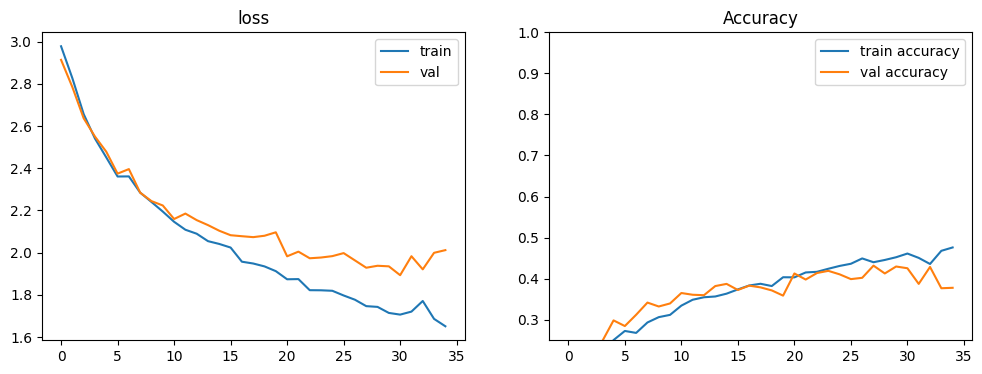

In [37]:
plot_history(history)

In [38]:
test = np.array([np.array(Image.open('./data/test/cmonet.jpg').resize(torsize))])


In [39]:
test.shape

(1, 32, 32, 3)

In [40]:
famous_artists[np.argmax(model.predict(test))]


1/1 [==============================] - 0s 56ms/step


'Theophile Steinlen'

In [41]:
famous_artists

['Paul Cezanne',
 'Ilya Repin',
 'Edgar Degas',
 'Boris Kustodiev',
 'Giovanni Battista Piranesi',
 'Vincent van Gogh',
 'Pyotr Konchalovsky',
 'Martiros Saryan',
 'Childe Hassam',
 'John Singer Sargent',
 'Gustave Dore',
 'Theophile Steinlen',
 'Camille Pissarro',
 'Albrecht Durer',
 'Pierre-Auguste Renoir',
 'Ivan Aivazovsky',
 'Eugene Boudin',
 'Rembrandt',
 'Pablo Picasso',
 'Zdislav Beksinski']

## Data augmentation

In [42]:

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [43]:
len(X_train)*.8

3777.6000000000004

In [46]:
X_tr = X_train[:3777]
y_tr = y_train[:3777]
X_val = X_train[3777:]
y_val = y_train[3777:]


train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

model = model_20()

# The fit
history_aug = model.fit(train_flow, 
                        epochs = 50, 
                        callbacks = [es], 
                        validation_data = (X_val, y_val))

Epoch 1/50
60/60 [==============================] - 2s 18ms/step - loss: 10.4410 - accuracy: 0.0530 - val_loss: 2.9974 - val_accuracy: 0.0381
Epoch 2/50
60/60 [==============================] - 1s 16ms/step - loss: 2.9962 - accuracy: 0.0537 - val_loss: 2.9958 - val_accuracy: 0.0455
Epoch 3/50
60/60 [==============================] - 1s 17ms/step - loss: 2.9953 - accuracy: 0.0551 - val_loss: 2.9952 - val_accuracy: 0.0455
Epoch 4/50
60/60 [==============================] - 1s 17ms/step - loss: 2.9936 - accuracy: 0.0519 - val_loss: 2.9945 - val_accuracy: 0.0455
Epoch 5/50
60/60 [==============================] - 1s 16ms/step - loss: 2.9936 - accuracy: 0.0548 - val_loss: 2.9945 - val_accuracy: 0.0519
Epoch 6/50
60/60 [==============================] - 1s 18ms/step - loss: 2.9924 - accuracy: 0.0553 - val_loss: 2.9942 - val_accuracy: 0.0519
Epoch 7/50
60/60 [==============================] - 1s 17ms/step - loss: 2.9934 - accuracy: 0.0506 - val_loss: 2.9945 - val_accuracy: 0.0519
Epoch 8/50
6

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

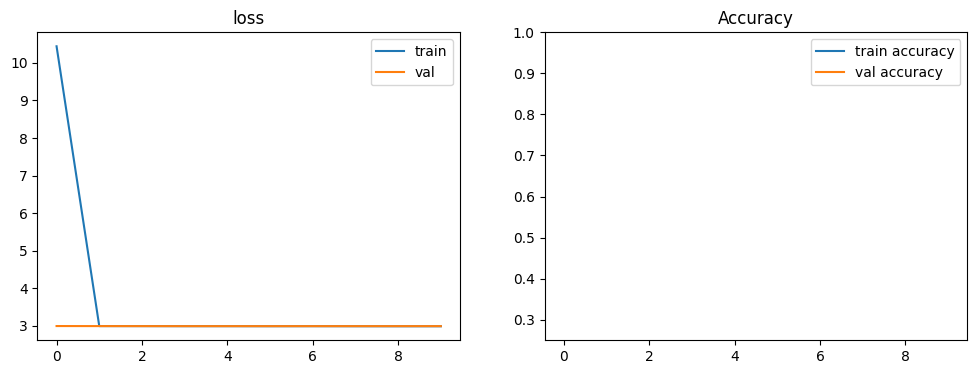

In [47]:
plot_history(history_aug)

## Get Picasso


In [60]:
df_famous['PabloPicasso'] = df_famous.artist.map(lambda x : 1 if x=='Pablo Picasso' else 0 )

In [62]:
X= df_famous.image
y=df_famous['PabloPicasso']




In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [64]:
X_train = np.array(list(X_train))
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [68]:
def model_2():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=size))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [69]:
model = model_2()
history = model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50
119/119 [==============================] - 2s 10ms/step - loss: 0.2138 - accuracy: 0.9476 - val_loss: 0.3280 - val_accuracy: 0.9418
Epoch 2/50
119/119 [==============================] - 1s 9ms/step - loss: 0.2064 - accuracy: 0.9531 - val_loss: 0.2736 - val_accuracy: 0.9418
Epoch 3/50
119/119 [==============================] - 1s 10ms/step - loss: 0.1859 - accuracy: 0.9531 - val_loss: 0.2166 - val_accuracy: 0.9418
Epoch 4/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1829 - accuracy: 0.9531 - val_loss: 0.2403 - val_accuracy: 0.9418
Epoch 5/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1703 - accuracy: 0.9531 - val_loss: 0.2117 - val_accuracy: 0.9418
Epoch 6/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1590 - accuracy: 0.9531 - val_loss: 0.1804 - val_accuracy: 0.9418
Epoch 7/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1498 - accuracy: 0.9534 - val_loss: 0.1917 - val_accuracy: 0.9418
Epoc

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

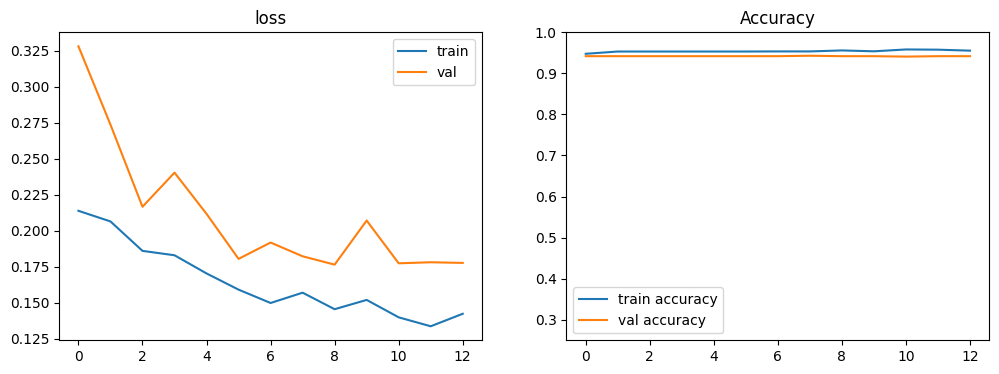

In [70]:
plot_history(history)

In [94]:
test = np.array([np.array(Image.open('./data/test/100004.jpg').resize(torsize))])
                 


In [95]:
model.predict(test)

1/1 [==============================] - 0s 81ms/step


array([[1.000000e+00, 9.092176e-27]], dtype=float32)

## In test 

In [98]:
df.artist_group.unique()

array(['train_only', 'train_and_test'], dtype=object)

In [97]:
df[df.artist_group=='test_only']

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,impath
